<a href="https://colab.research.google.com/github/Behnammmmmmmm/Complete-Python-3-Bootcamp/blob/master/CNN_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **needed libraries**
![59954intro to CNN.jpg](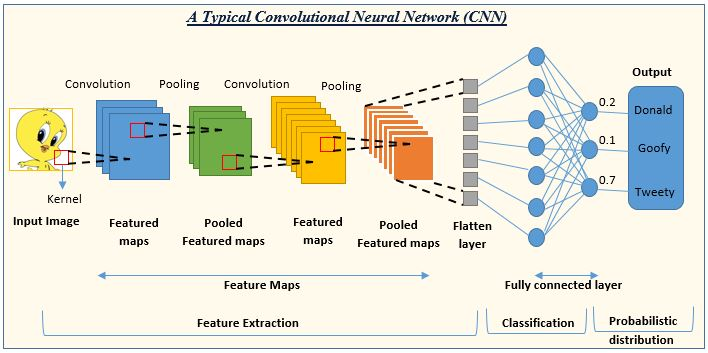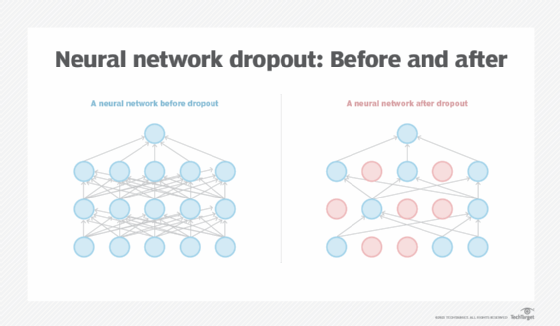)

In [ ]:
!pip install np_utils
import numpy
from tensorflow import keras
from keras.constraints import max_norm
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [3]:
(X_train , Y_train ) , (X_test , Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [61]:
X_test.shape



(10000, 32, 32, 3)

In [ ]:
plt.imshow(X_train[0])

# **normalizing and one-hot encoding**

In [4]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
plt.imshow(X_train[0])

In [5]:
from keras.utils import to_categorical

In [59]:
# One-hot encode outputs
Y_train =to_categorical(Y_train)
Y_test =to_categorical(Y_test)

In [8]:
num_class = Y_test.shape[1] #10

# **building the model**

In [35]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten()) #making it one dimensional
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(num_class, activation = 'softmax')) #active func of output is softmax (0-1)

# **compiling the model**
#loss : a func for model to recognize his own loss
# optimizer for optimizing itself

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)


In [37]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)       

# **Training the moedl**

In [38]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size = 64 )

Epoch 1/30
782/782 [==============================] - 79s 95ms/step - loss: 1.6529 - accuracy: 0.4113 - val_loss: 1.3214 - val_accuracy: 0.5407
Epoch 2/30
782/782 [==============================] - 73s 93ms/step - loss: 1.1810 - accuracy: 0.5801 - val_loss: 0.9432 - val_accuracy: 0.6653
Epoch 3/30
782/782 [==============================] - 73s 93ms/step - loss: 1.0132 - accuracy: 0.6461 - val_loss: 0.9688 - val_accuracy: 0.6547
Epoch 4/30
782/782 [==============================] - 72s 91ms/step - loss: 0.9250 - accuracy: 0.6767 - val_loss: 0.9659 - val_accuracy: 0.6610
Epoch 5/30
782/782 [==============================] - 72s 92ms/step - loss: 0.8627 - accuracy: 0.7015 - val_loss: 0.7313 - val_accuracy: 0.7474
Epoch 6/30
782/782 [==============================] - 74s 94ms/step - loss: 0.8231 - accuracy: 0.7127 - val_loss: 0.7547 - val_accuracy: 0.7322
Epoch 7/30
782/782 [==============================] - 73s 93ms/step - loss: 0.7865 - accuracy: 0.7270 - val_loss: 0.7561 - val_accuracy:

# **graphical analyse**
methods : using more data(data agumantation) - drop out - bach normalization

<Axes: >

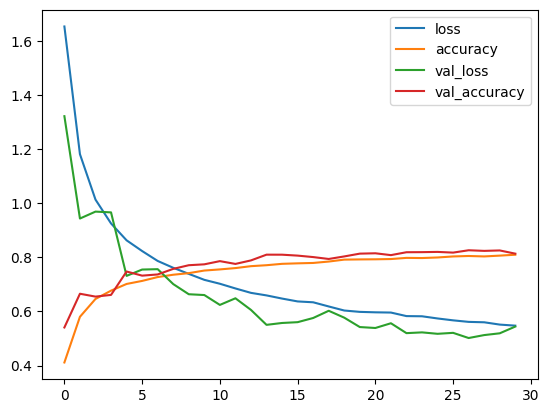

In [39]:
pd.DataFrame(history.history).plot()

In [52]:
model.save('CNN_cifar10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:

model2 = load_model('CNN_cifar10.h5')

In [55]:
model2.predict(X_test[0:10])[0]

1/1 [==============================] - 0s 408ms/step


array([1.8273966e-03, 1.8252409e-04, 3.1308210e-04, 7.3374116e-01,
       1.2277051e-04, 2.6194555e-01, 9.8840799e-04, 6.4509141e-04,
       1.7804716e-04, 5.5989563e-05], dtype=float32)

In [56]:
labels[3]

'cat'

In [60]:
Y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [29]:
import pandas as pd


<Axes: >

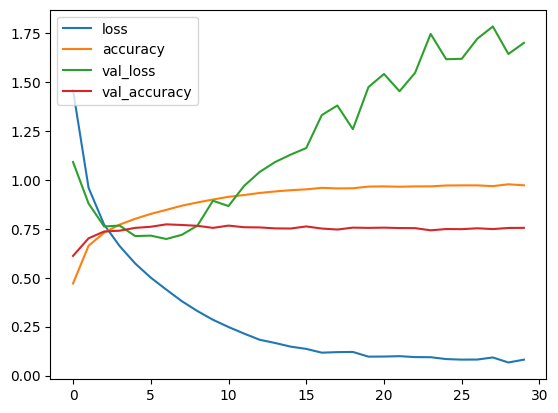

In [34]:
pd.DataFrame(history.history).plot()
# now we have overfitting , lass of validation is to high or the acc of validation doesnt get better .

In [50]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


313/313 [==============================] - 7s 22ms/step


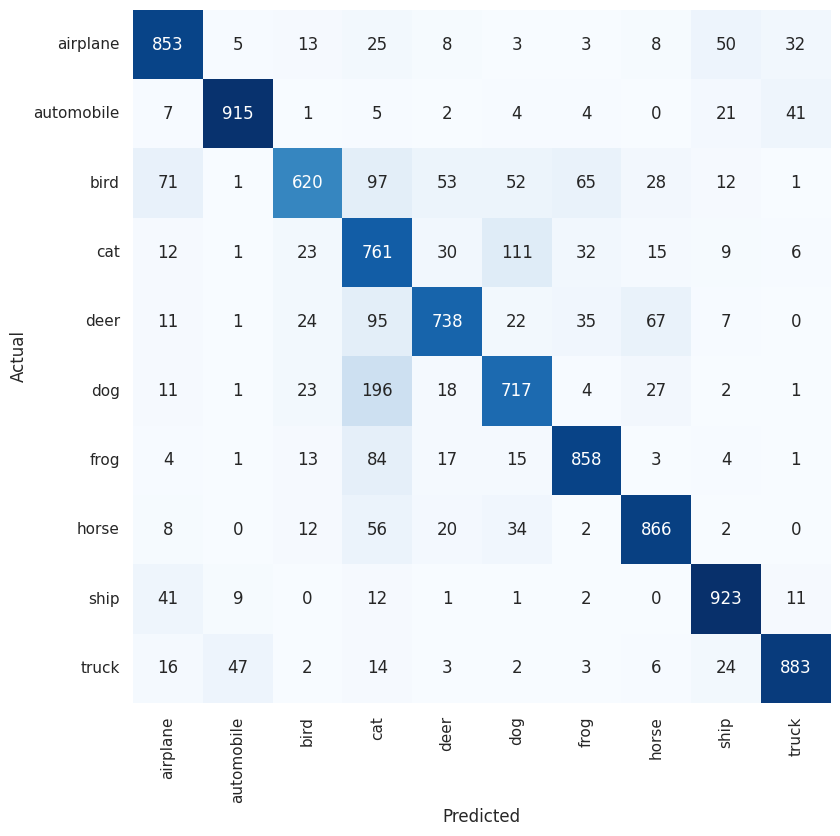

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predicting test data
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

# Creating confusion matrix
cm = confusion_matrix(Y_test, predictions)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()